In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
disturbance = pd.read_excel('../data/nsw-assessment-of-grazing-intensity.xlsx', sheet_name='animal disturbance')
print(disturbance.shape)
disturbance.head(3)

(1504, 7)


,Community,Site,Belt_length(m),Belt width (m),Belt_area(m2),Attribute,Count
0,Black box,BLA_001,200,10,200,Kangaroo hip holes,5
1,Black box,BLA_001,200,10,200,Rabbit burrows,0
2,Black box,BLA_001,200,10,200,Rabbit latrines,1


In [3]:
attribute = disturbance.groupby('Attribute').sum()['Count']
attribute

C:\Users\HP\AppData\Local\Temp\ipykernel_24240\1462270239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  attribute = disturbance.groupby('Attribute').sum()['Count']


Attribute
Kangaroo hip holes    2157
Rabbit burrows         634
Rabbit latrines       1101
Rabbit warrens         145
Name: Count, dtype: int64

Text(0, 0.5, 'Total Observed')

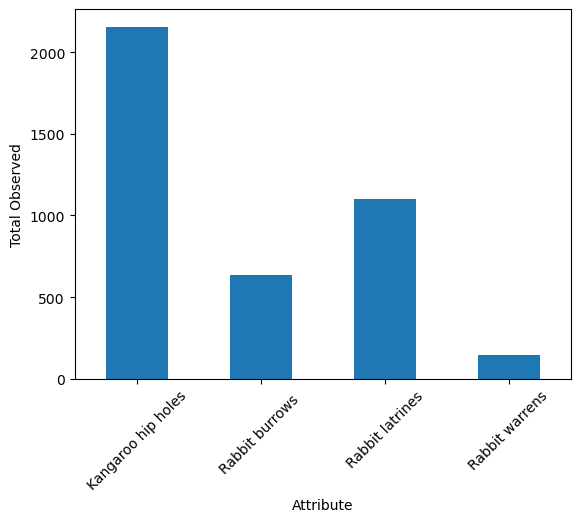

In [4]:
attribute.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel("Total Observed")

In [5]:
dung = pd.read_excel('../data/nsw-assessment-of-grazing-intensity.xlsx', sheet_name='animal dung')
print(dung.shape)
dung.head(3)

(6019, 7)


,Community,Site,Site.1,Scale,Animal,Attribute,Counts
0,Black box,BLA_001_000,BLA_001,0.25,Kangaroo,dung,1
1,Black box,BLA_001_000,BLA_001,25.00,Cow,dung,28
2,Black box,BLA_001_000,BLA_001,25.00,Kangaroo,dung,10


In [6]:
pivot = pd.pivot_table(dung,
                       values='Counts',
                       index='Animal',
                       columns=['Attribute'],
                       aggfunc='sum',
                       margins=True)
pivot

Attribute,digs,dung,pugging,All
Animal,,,,
Cow,NaN,4634.0,8452.0,13086
Kangaroo,NaN,105541.0,NaN,105541
Rabbit,2979.0,131629.0,NaN,134608
Sheep,NaN,44980.0,NaN,44980
All,2979.0,286784.0,8452.0,298215


In [7]:
dung1 = dung[dung['Attribute'].notna()]

# keep only dung counts
dung1 = dung[dung['Attribute'].str.contains('dung')]

dung1.head()

,Community,Site,Site.1,Scale,Animal,Attribute,Counts
0,Black box,BLA_001_000,BLA_001,0.25,Kangaroo,dung,1
1,Black box,BLA_001_000,BLA_001,25.00,Cow,dung,28
2,Black box,BLA_001_000,BLA_001,25.00,Kangaroo,dung,10
3,Black box,BLA_001_000,BLA_001,25.00,Rabbit,dung,5
4,Black box,BLA_001_000,BLA_001,25.00,Sheep,dung,5


In [8]:
pivot1 = pd.pivot_table(dung1,
                       values='Counts',
                       index='Animal',
                       columns=['Attribute'],
                       aggfunc='sum',
                       margins=True)
pivot1

Attribute,dung,All
Animal,,
Cow,4634,4634
Kangaroo,105541,105541
Rabbit,131629,131629
Sheep,44980,44980
All,286784,286784


In [9]:
# for index in pivot:
#     pivot[index] = pivot[index]/pivot['All']
# pivot

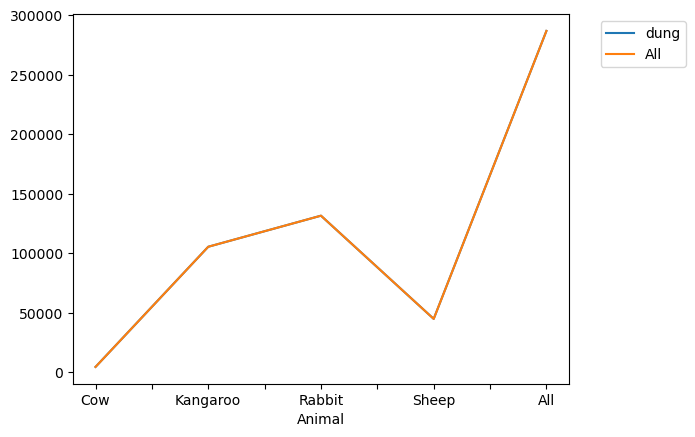

In [10]:
pivot1.plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

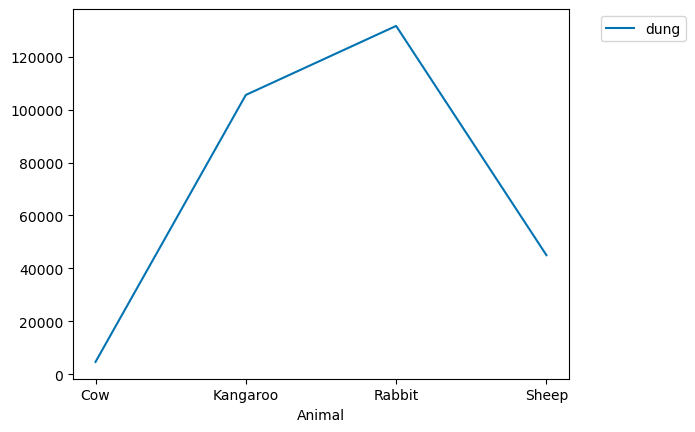

In [11]:
sns.lineplot(data=pivot1.iloc[:-1].drop(columns=['All'], 
                                       axis=0), palette='colorblind') #iloc[:-1] causes the "All" row to not be graphed
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [12]:
dung_sum = dung.groupby('Attribute').sum()['Counts']
dung_sum

C:\Users\HP\AppData\Local\Temp\ipykernel_24240\273759206.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dung_sum = dung.groupby('Attribute').sum()['Counts']


Attribute
digs         2979
dung       286784
pugging      8452
Name: Counts, dtype: int64

<Axes: xlabel='Attribute'>

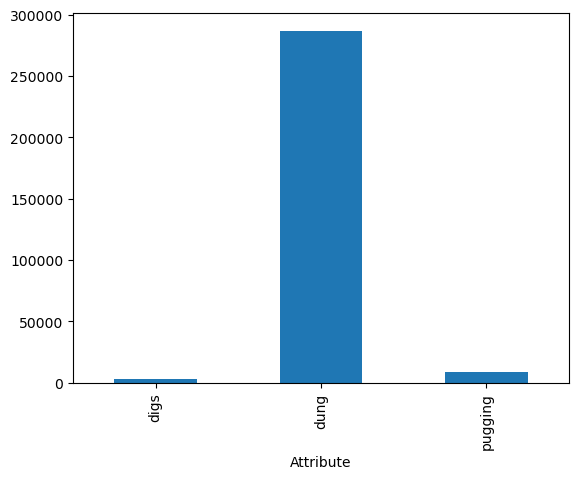

In [13]:
dung_sum.plot(kind='bar')

In [14]:
tracks = pd.read_excel('../data/nsw-assessment-of-grazing-intensity.xlsx', sheet_name='tracks')
print(tracks.shape)
tracks.head(3)

(1568, 7)


,Community,Site,Belt_length_m,Animal,Track_width_cm,Track_depth_cm,Track_area_cm2
0,Cypress pine,CYP_002,200,Livestock,30,1.0,30.0
1,Cypress pine,CYP_002,200,Livestock,60,1.0,60.0
2,Cypress pine,CYP_004,200,Livestock,45,1.0,45.0


In [15]:
tracks_count = tracks['Community'].value_counts()
tracks_count

Black box       1031
Cypress pine     378
Redgum           159
Name: Community, dtype: int64

<Axes: >

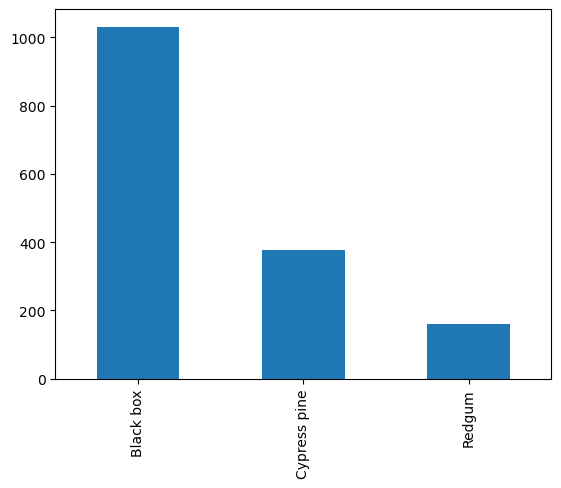

In [16]:
tracks_count.plot(kind='bar')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [17]:
tracks_count = tracks['Animal'].value_counts()
tracks_count

Livestock    1522
Kangaroo       45
Emu             1
Name: Animal, dtype: int64

tracks_count.plot(kind='bar')

In [18]:
area = tracks['Track_area_cm2'].value_counts()
area

10.0     217
15.0     161
20.0     115
60.0     110
30.0     105
        ... 
62.5       1
65.0       1
480.0      1
560.0      1
14.0       1
Name: Track_area_cm2, Length: 83, dtype: int64

## Do I want to keep using this dataset? Let's keep exploring other values I can measure in this dataset

In [19]:
tracks.head(3)

,Community,Site,Belt_length_m,Animal,Track_width_cm,Track_depth_cm,Track_area_cm2
0,Cypress pine,CYP_002,200,Livestock,30,1.0,30.0
1,Cypress pine,CYP_002,200,Livestock,60,1.0,60.0
2,Cypress pine,CYP_004,200,Livestock,45,1.0,45.0
